<a href="https://colab.research.google.com/github/sanjanagarai/Stock_Price_Prediction/blob/main/Stacked_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
!pip install yfinance

In [2]:
!pip install tensorflow

In [3]:
### Data Collection
import pandas_datareader as pdr
key=""

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Set the ticker symbol and timeframe
ticker_symbol = 'HDFCBANK.NS'  # Use .BO for BSE or .NS for NSE
start_date = '2018-05-01'
end_date = '2023-05-01'

# Fetch the data
hdfc_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the fetched data
print(hdfc_data.head())

# Save data to a Pandas DataFrame
hdfc_dataframe = pd.DataFrame(hdfc_data)

# Optionally, save the data to a CSV file
hdfc_dataframe.to_csv('hdfc_stock_data.csv')


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-05-02  975.000000  989.000000  973.000000  984.750000  944.183472   
2018-05-03  984.025024  987.450012  973.000000  983.950012  943.416382   
2018-05-04  985.000000  995.000000  983.150024  994.250000  953.292175   
2018-05-07  990.825012  993.650024  987.500000  988.700012  947.970886   
2018-05-08  989.625000  989.950012  977.299988  983.525024  943.008972   

             Volume  
Date                 
2018-05-02  3550024  
2018-05-03  2076386  
2018-05-04  3440718  
2018-05-07  2632064  
2018-05-08  3550282  


In [5]:
df=pd.read_csv('hdfc_stock_data.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-02,975.000000,989.000000,973.000000,984.750000,944.183472,3550024
1,2018-05-03,984.025024,987.450012,973.000000,983.950012,943.416382,2076386
2,2018-05-04,985.000000,995.000000,983.150024,994.250000,953.292175,3440718
3,2018-05-07,990.825012,993.650024,987.500000,988.700012,947.970886,2632064
4,2018-05-08,989.625000,989.950012,977.299988,983.525024,943.008972,3550282


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2023-04-24,1687.000000,1691.449951,1674.099976,1688.150024,1669.010010,17837926
1230,2023-04-25,1687.699951,1687.699951,1661.900024,1664.150024,1645.282104,25176534
1231,2023-04-26,1660.000000,1675.000000,1655.000000,1671.800049,1652.845337,13696375
1232,2023-04-27,1670.500000,1685.250000,1665.849976,1681.000000,1661.941040,23895196
1233,2023-04-28,1684.699951,1691.000000,1670.000000,1687.599976,1668.466187,13958136


In [8]:
df1=df.reset_index()['Close']

In [9]:
df1

0        984.750000
1        983.950012
2        994.250000
3        988.700012
4        983.525024
           ...     
1229    1688.150024
1230    1664.150024
1231    1671.800049
1232    1681.000000
1233    1687.599976
Name: Close, Length: 1234, dtype: float64

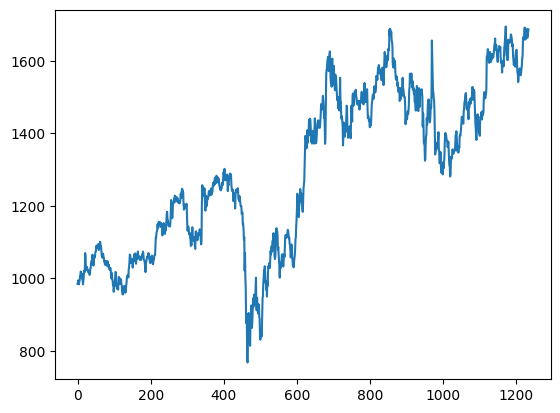

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [12]:
df1

0        984.750000
1        983.950012
2        994.250000
3        988.700012
4        983.525024
           ...     
1229    1688.150024
1230    1664.150024
1231    1671.800049
1232    1681.000000
1233    1687.599976
Name: Close, Length: 1234, dtype: float64

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.23394049]
 [0.23307825]
 [0.24417977]
 ...
 [0.97445575]
 [0.98437163]
 [0.99148521]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(802, 432)

In [17]:
train_data

array([[0.23394049],
       [0.23307825],
       [0.24417977],
       [0.23819789],
       [0.23262019],
       [0.2387368 ],
       [0.24644316],
       [0.25670941],
       [0.2620985 ],
       [0.27074802],
       [0.26296074],
       [0.26533196],
       [0.25692499],
       [0.24663183],
       [0.24493426],
       [0.23286268],
       [0.2428325 ],
       [0.25506571],
       [0.27311917],
       [0.26794566],
       [0.27643354],
       [0.3255281 ],
       [0.30998064],
       [0.27527481],
       [0.28465191],
       [0.28128372],
       [0.28389736],
       [0.27697245],
       [0.27317311],
       [0.27400838],
       [0.2673259 ],
       [0.27053245],
       [0.26632893],
       [0.26069735],
       [0.26304159],
       [0.28063693],
       [0.28141845],
       [0.29529537],
       [0.30154663],
       [0.300873  ],
       [0.31105846],
       [0.32089356],
       [0.30882191],
       [0.28985233],
       [0.28820863],
       [0.30618131],
       [0.31706725],
       [0.312

In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(331, 100)
(331,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 21s 864ms/step - loss: 0.0573 - val_loss: 0.0346
Epoch 2/100
11/11 [==============================] - 2s 202ms/step - loss: 0.0118 - val_loss: 0.0049
Epoch 3/100
11/11 [==============================] - 3s 280ms/step - loss: 0.0086 - val_loss: 0.0144
Epoch 4/100
11/11 [==============================] - 3s 296ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 5/100
11/11 [==============================] - 2s 204ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 6/100
11/11 [==============================] - 2s 203ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 7/100
11/11 [==============================] - 2s 203ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/100
11/11 [==============================] - 2s 204ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 9/100
11/11 [==============================] - 3s 326ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/100
11/11 [==============================] - 3s 256ms/step - loss: 0.0032 - val_l

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.14.0'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1215.7899677352498

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1498.1986896949027

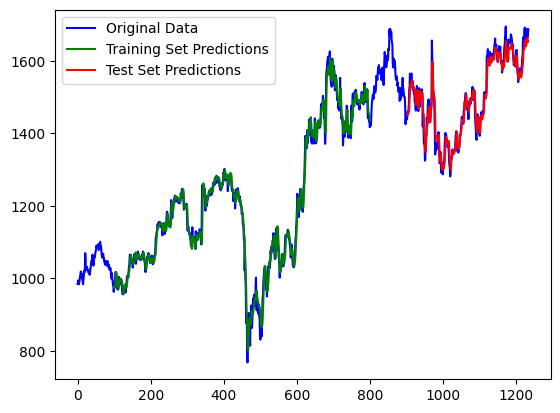

In [34]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plotting with specified colors
plt.plot(scaler.inverse_transform(df1), color='blue', label='Original Data')
plt.plot(trainPredictPlot, color='green', label='Training Set Predictions')
plt.plot(testPredictPlot, color='red', label='Test Set Predictions')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [35]:
len(test_data)

432

In [36]:
x_input=test_data[332:].reshape(1,-1)
x_input.shape


(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.9047208174421876,
 0.9110260294091043,
 0.9090860350337066,
 0.9083314831352388,
 0.9180857932744889,
 0.9305346496876045,
 0.9442228921309842,
 0.9491270189772764,
 0.9641625345575889,
 0.9313430135697639,
 0.9398038625557733,
 0.9453007106405303,
 0.9330674968711096,
 0.9160379117924226,
 0.9100560980062266,
 0.8945354851548327,
 0.9288100348166165,
 0.9305884616712964,
 0.9291873765506716,
 0.941582289410453,
 0.927408949695992,
 0.9280016709344571,
 0.9394804643750524,
 0.9079004609871341,
 0.8967449341576171,
 0.8910325749988076,
 0.8943737860644724,
 0.8629015382135804,
 0.887260210215396,
 0.8964216675465387,
 0.8977689406834714,
 0.8812244528758658,
 0.9066609433872276,
 0.9372710153722682,
 0.9446001022953968,
 0.9627613178673219,
 0.9758568390722367,
 1.0,
 0.949504229141689,
 0.9140979174170248,
 0.9123194905623452,
 0.9008406971217496,
 0.9267622849041927,
 0.9006789980313893,
 0.9604441133275113,
 0.9528454402073537,
 0.955486042927885,
 0.9552705318538327,
 0.951552110

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9678092]
101
1 day input [0.91102603 0.90908604 0.90833148 0.91808579 0.93053465 0.94422289
 0.94912702 0.96416253 0.93134301 0.93980386 0.94530071 0.9330675
 0.91603791 0.9100561  0.89453549 0.92881003 0.93058846 0.92918738
 0.94158229 0.92740895 0.92800167 0.93948046 0.90790046 0.89674493
 0.89103257 0.89437379 0.86290154 0.88726021 0.89642167 0.89776894
 0.88122445 0.90666094 0.93727102 0.9446001  0.96276132 0.97585684
 1.         0.94950423 0.91409792 0.91231949 0.9008407  0.92676228
 0.900679   0.96044411 0.95284544 0.95548604 0.95527053 0.95155211
 0.95861174 0.95995902 0.9765035  0.97283903 0.96631817 0.95731841
 0.94055828 0.94718689 0.9123733  0.90057124 0.88515839 0.88941585
 0.89663718 0.89496664 0.8803082  0.91420567 0.92649283 0.92999574
 0.93015731 0.88483512 0.86317099 0.85864408 0.8344471  0.84522529
 0.86759002 0.85584177 0.87491911 0.87098518 0.85735075 0.8546562
 0.86198529 0.87572747 0.883919   0.90736155 0.90843937 0.95500108
 0.96858156 0.96006677 0.9652943  0.

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

1234

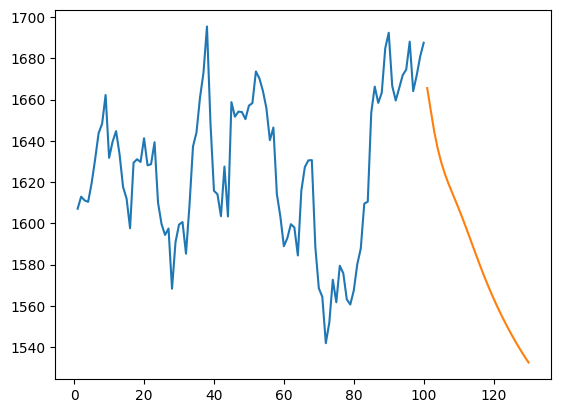

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1134:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

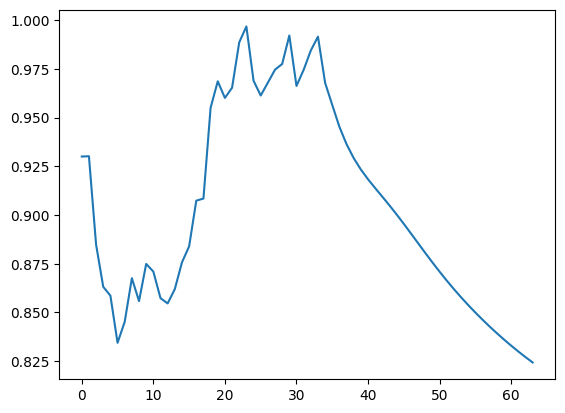

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

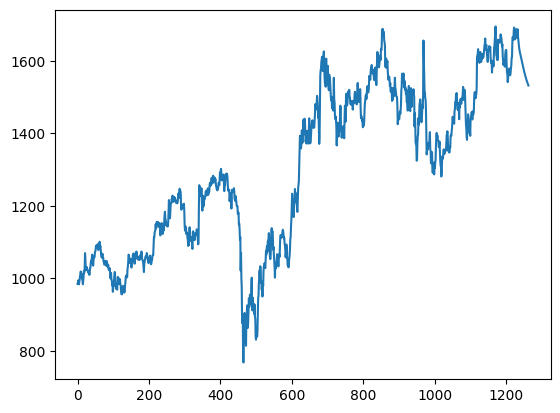

In [46]:
plt.plot(df3)

In [47]:
df1=df.reset_index()['Close']

In [48]:
df1

0        984.750000
1        983.950012
2        994.250000
3        988.700012
4        983.525024
           ...     
1229    1688.150024
1230    1664.150024
1231    1671.800049
1232    1681.000000
1233    1687.599976
Name: Close, Length: 1234, dtype: float64

In [49]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [50]:
# Load the last 100 days of the dataset
last_100_days = df1[-100:]

# Predict the next day's close price
predicted_price = model.predict(last_100_days)

# Inverse transform to get the actual predicted price
predicted_price = scaler.inverse_transform(predicted_price)

# Print the predicted price
print("Predicted Close Price for 02.05.2023:", predicted_price)


TypeError: ignored

In [ ]:
start_date = '2023-05-02'
end_date = '2023-05-03'

# Fetch the data for the specified date
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the closing price for 02.05.2023
print("Closing price on 02.05.2023:", stock_data['Close'].values[0])

In [ ]:
last_100_days

In [ ]:
last_100_days